<a href="https://colab.research.google.com/github/Harshita0201/Machine_Learning/blob/main/7_2thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
#we do not need the independent and dependent matrix of features to implement reinforcement learning algo

## Implementing Thompson Sampling

In [3]:
import random

#step 1 
N = 10000 #total number of users or rounds
d = 10 #total number of ads..ad1, ad2, ad3,....ad10
ads_selected=[] #(initially empty list) list of all selected ads
numbers_of_rewards_1 = [0] * d #Ni1(n) the number of times ad i got reward 1 upto round n , empty list of 10 0s as initially noad got any reward 
numbers_of_rewards_0 = [0] * d#Ni0(n) the number of times ad i got reward 0 upto round n, "
total_reward = 0


#step 2
for n in range(0, N): #for each user from total 10k users/ rounds
  ad = 0 #inidicates the index of the ad selected after each round n
  max_random = 0  #maximum of all the random draws
  for i in range(0,d): #for each ad i from total 10 ads 

    #step 2 : for each ad i we calculate random draw from distribution : theta.i(n) = beta(Ni1(n)+1, Ni0(n)+1)
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

    #step 3: we select the ad that has highest theta.i(n) or random_beta
    if(random_beta > max_random): #update the maximum random draw
      max_random = random_beta
      ad = i #select the ad at index i which has max random draw

  ads_selected.append(ad)  
  reward = dataset.values[n, ad] #for user at index n and index of highest random value ad 'ad'  
  if(reward == 1): # #reward collected is 0
    numbers_of_rewards_1[ad]+=1
  else: #reward collected is 0
    numbers_of_rewards_0[ad]+=1  
  total_reward+=reward  


## Visualising the results - Histogram

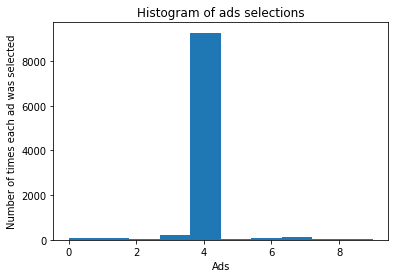

In [4]:
#histogram plot for each ad for how many times it was selected
#on the x-axis we have number of ads from 0 to 9
#on the y-axis the number of times they were selected
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Ad at index 4 was the clearly the one most selected or highest click through rate. the above Thompson sampling model will just work fine for reduced number of rounds eg for N=1000 and upto N=500. 
this suggests it is better (more powerful) than UCB.